# *Offline Handwritten Text Recognition*

### The purpose of this notebook is extracting handwritten data from image form. 

## What is Offline Handwritten Text Recognition?
Offline handwriting recognition involves the automatic conversion of text in an image into letter codes that are usable within computer and text-processing applications. In simple terms, it is the text extraction from your handwritten notebooks/pages. Why called offline? The point being that there is an online text recognition system, which is referred for text that is digitally generated by using tools like stylus, apple pencil, etc.

## Approach

* **Step1** :  Build a digit(0-9) + A-Z characters classifier model using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import pytesseract
from pytesseract import Output

import shutil
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [2]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
len(train_data)

156000

In [4]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

18729

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [8]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [9]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [10]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [11]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [12]:
print(train_X.shape,val_X.shape)

(156000, 32, 32, 1) (18729, 32, 32, 1)


In [13]:
print(train_Y.shape,val_Y.shape)

(156000, 39) (18729, 39)


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [17]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4875/4875 [==============================] - 15s 3ms/step - loss: 0.5982 - accuracy: 0.8131 - val_loss: 0.2519 - val_accuracy: 0.9204
Epoch 2/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.3244 - accuracy: 0.8918 - val_loss: 0.2482 - val_accuracy: 0.9176
Epoch 3/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.2798 - accuracy: 0.9044 - val_loss: 0.2062 - val_accuracy: 0.9273
Epoch 4/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.2582 - accuracy: 0.9124 - val_loss: 0.2084 - val_accuracy: 0.9230
Epoch 5/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.2431 - accuracy: 0.9175 - val_loss: 0.1777 - val_accuracy: 0.9395
Epoch 6/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.2321 - accuracy: 0.9187 - val_loss: 0.1899 - val_accuracy: 0.9342
Epoch 7/50
4875/4875 [==============================] - 14s 3ms/step - loss: 0.2225 - accuracy: 0.9222 - val_loss: 0.2049 - val_ac

In [18]:
model.save('handwritten_model.keras')

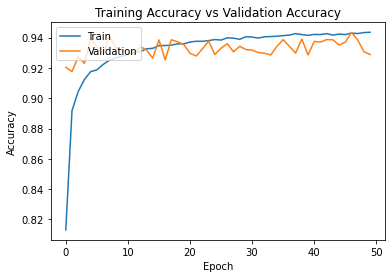

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

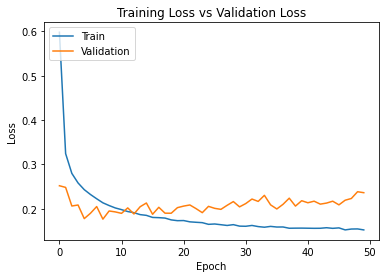

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [21]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [22]:
# create a function to predict letters
def get_letters(img):
    # List to store information about detected letters
    letters = []

    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # sort_contours function --> sort contours from left to right
    contours = sort_contours(contours, method="left-to-right")[0]

    # Create an empty DataFrame to store bounding box information and character
    df = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'character'])

    for contour in contours:
        # Skip small contours (noise)
        if cv2.contourArea(contour) < 15:
            continue

        # Get bounding box coordinates (x, y, width, height)
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the region of interest (ROI) from the grayscale image
        roi = gray[y-5:y + h+5, x-5:x +5+ w]

        # Apply thresholding to the ROI
        thresh_roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        # Resize the thresholded ROI to a consistent size
        thresh_roi = cv2.resize(thresh_roi, (32, 32), interpolation=cv2.INTER_CUBIC)

        # Normalize pixel values to the range [0, 1]
        thresh_roi = thresh_roi.astype("float32") / 255.0

        # Add a channel dimension to the thresholded ROI
        thresh_roi = np.expand_dims(thresh_roi, axis=-1)

        # Reshape the thresholded ROI for model prediction
        thresh_roi = thresh_roi.reshape(1, 32, 32, 1)

        # Make a prediction using the model (assumed to be defined as 'modell')
        ypred = model.predict(thresh_roi, verbose=0)

        # Inverse transform the prediction using the label binarizer (LB)
        ypred = LB.inverse_transform(ypred)

        # Extract the predicted character
        [p] = ypred

        # Draw the predicted character on the original image
        cv2.putText(img=image, text=p, org=(x, y), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.0,
                    color=(255, 0, 0), thickness=2)

        # Store information about the letter in a dictionary
        new_data = {
            'x': x,
            'y': y,
            'w': w,
            'h': h,
            'character': p
        }

        # Append new data to the DataFrame
        df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)

    # Return the DataFrame and the image with drawn characters
    return df, image

0    G
1    M
2    E
3    S
4    R
Name: character, dtype: object

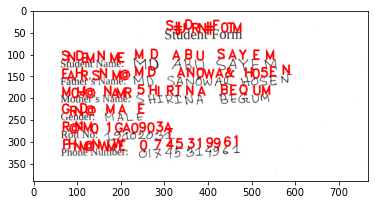

In [23]:
pred_df,output_image = get_letters("/kaggle/input/handwritten-image-form/sayem_jan16.JPG")
plt.imshow(output_image)
pred_df['character'].head()

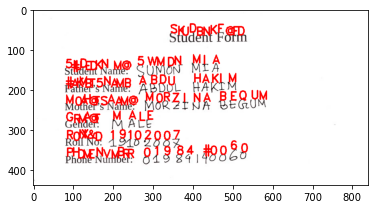

In [24]:
pred_df,output_image = get_letters("/kaggle/input/handwritten-image-form/sumon_jan16.JPG")
plt.imshow(output_image)

0    S
1    A
2    Y
3    E
4    M
Name: character, dtype: object

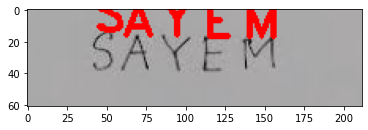

In [25]:
pred_df,output_image = get_letters("/kaggle/input/handwritten-image-form/sa.JPG")
plt.imshow(output_image)
pred_df['character']

In [26]:
word = ''.join(pred_df['character'])
word

'SAYEM'

## Drawbacks
1. The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
2. There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
3. This model will not work for connected texts like a cursive handwritten word.

## Conclusion 
This notebook is an illustration of how a character segmentation and classification approach can be used for offline handwritten text extraction. In order to improve the model, the model should be trained on the complete dataset, this notebook was trained on slightly less number of images due to session constraints. Also, for applying this method to a complete paragraph, following approach can be used, **line segmentation >> word segmentation >> character segmentation >> classification >> post-processing**. 

## References
1. [https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/](http://) 
2. [https://www.pyimagesearch.com/2015/04/20/sorting-contours-using-python-and-opencv/](http://)

If you liked this notebook, then do **Upvote** as it will keep me motivated in creating such kernels ahead. **Thanks!!**